## Simple example

How to use tight-layout to fit plots within your figure cleanly.

*tight_layout* automatically adjusts subplot params so that the
subplot(s) fits in to the figure area. This is an experimental
feature and may not work for some cases. It only checks the extents
of ticklabels, axis labels, and titles.

An alternative to *tight_layout* is `constrained_layout`.



With the default Axes positioning, the axes title, axis labels, or tick labels
can sometimes go outside the figure area, and thus get clipped.

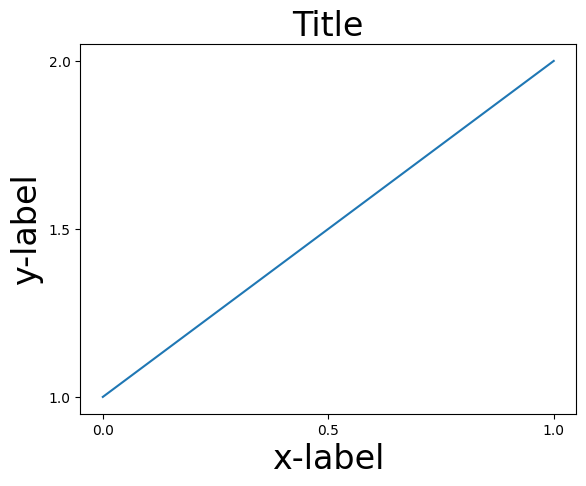

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)

To prevent this, the location of Axes needs to be adjusted. For
subplots, this can be done manually by adjusting the subplot parameters
using `Figure.subplots_adjust`. `Figure.tight_layout` does this
automatically.



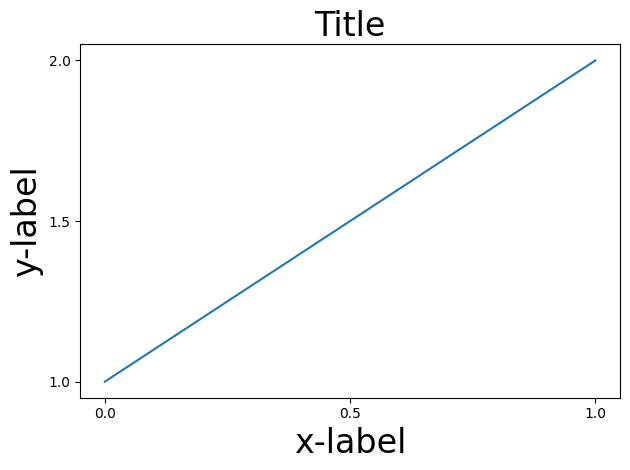

In [2]:
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()

Note that `matplotlib.pyplot.tight_layout()` will only adjust the subplot params when it is called. In order to perform this adjustment each time the figure is redrawn, you can call `fig.set_tight_layout(True)`, or, equivalently, set `rcParams["figure.autolayout"]` (default: `False`) to `True`.

When you have multiple subplots, often you see labels of different Axes overlapping each other.



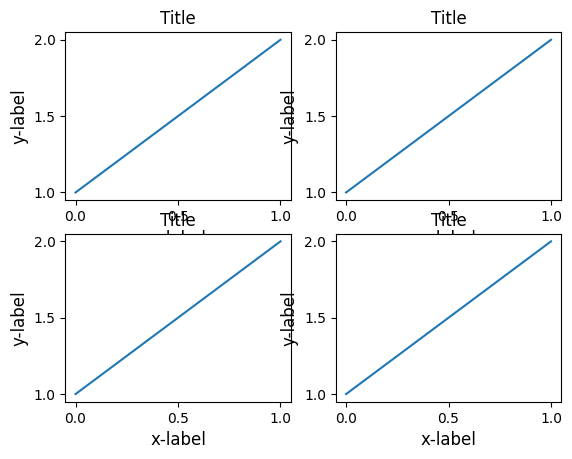

In [3]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

`tight_layout()` will also adjust spacing between subplots to minimize the overlaps.



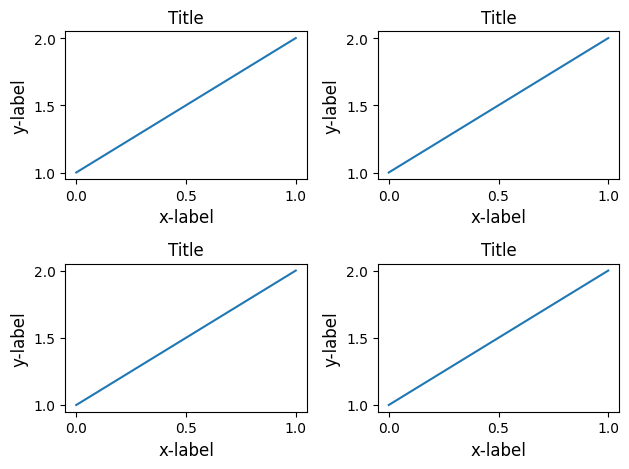

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

`tight_layout()` can take keyword arguments of *pad*, *w_pad* and *h_pad*. These control the extra padding around the
figure border and between subplots. The pads are specified in fraction of fontsize.



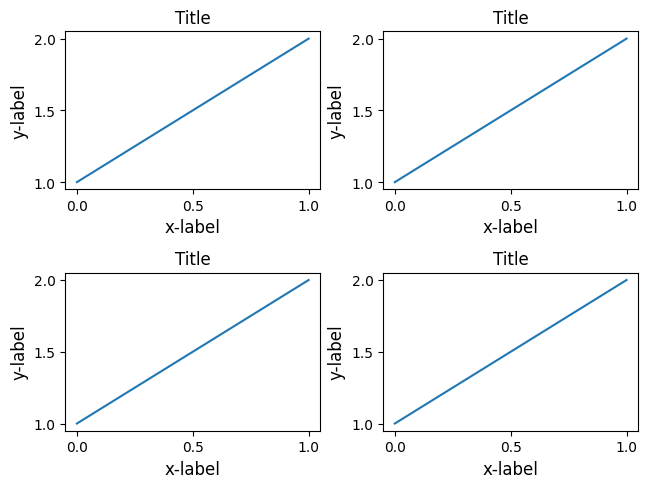

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

`tight_layout()` will work even if the sizes of
subplots are different as far as their grid specification is
compatible. In the example below, *ax1* and *ax2* are subplots of a 2x2
grid, while *ax3* is of a 1x2 grid.



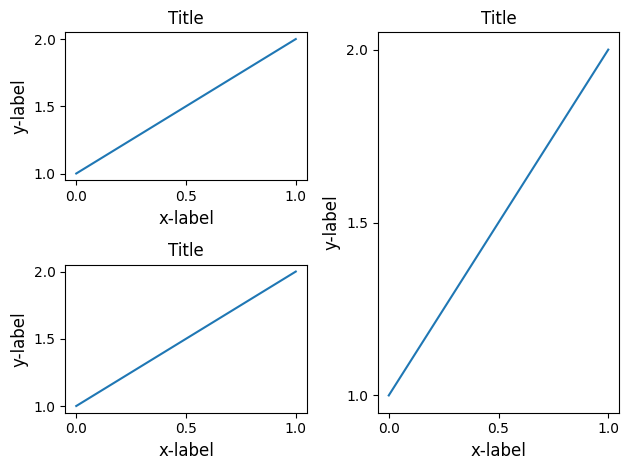

In [6]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()

It works with subplots created with `subplot2grid()`. In general, subplots created
from the gridspec will work.



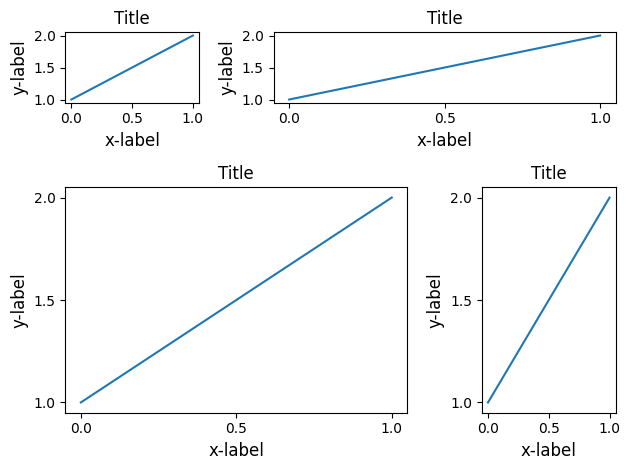

In [7]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.tight_layout()

Although not thoroughly tested, it seems to work for subplots with
aspect != "auto" (e.g., Axes with images).



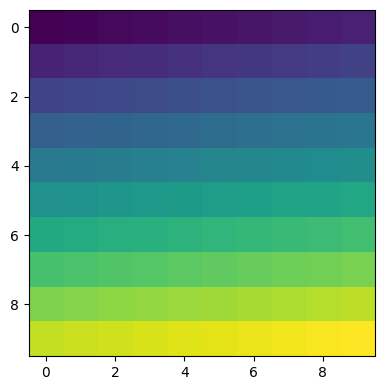

In [8]:
arr = np.arange(100).reshape((10, 10))

plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot()
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

## Caveats


* `tight_layout` considers all artists on the Axes by
  default.  To remove an artist from the layout calculation you can call
  `Artist.set_in_layout`.

* ``tight_layout`` assumes that the extra space needed for artists is
  independent of the original location of Axes. This is often true, but there
  are rare cases where it is not.

* ``pad=0`` can clip some texts by a few pixels. This may be a bug or
  a limitation of the current algorithm, and it is not clear why it
  happens. Meanwhile, use of pad larger than 0.3 is recommended.


## Use with GridSpec

GridSpec has its own `GridSpec.tight_layout` method (the pyplot api `pyplot.tight_layout` also works).

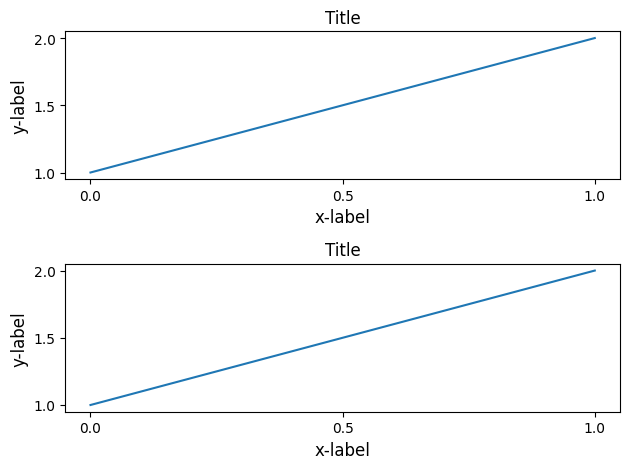

In [9]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)

You may provide an optional *rect* parameter, which specifies the bounding
box that the subplots will be fit inside. The coordinates are in
normalized figure coordinates and default to (0, 0, 1, 1) (the whole figure).



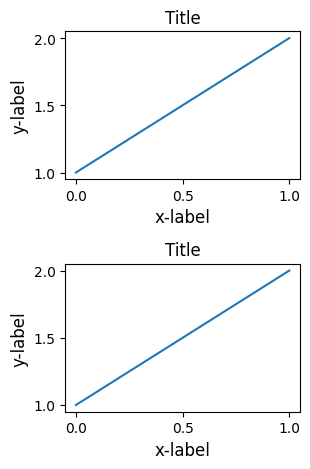

In [10]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1.0])

However, we do not recommend that this be used to manually construct more complicated layouts, like having one GridSpec in the left and one in the right side of the figure. For these use cases, one should instead take advantage of **Nested Gridspecs**, or the **Figure subfigures**.

## Legends and annotations


Pre Matplotlib 2.2, legends and annotations were excluded from the bounding
box calculations that decide the layout.  Subsequently, these artists were
added to the calculation, but sometimes it is undesirable to include them.
For instance in this case it might be good to have the Axes shrink a bit
to make room for the legend:

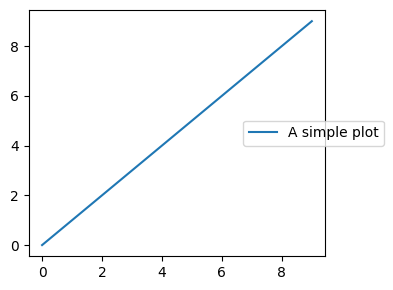

In [11]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='A simple plot')
ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
fig.tight_layout()
plt.show()

However, sometimes this is not desired (quite often when using
``fig.savefig('outname.png', bbox_inches='tight')``).  In order to
remove the legend from the bounding box calculation, we simply set its
bounding ``leg.set_in_layout(False)`` and the legend will be ignored.



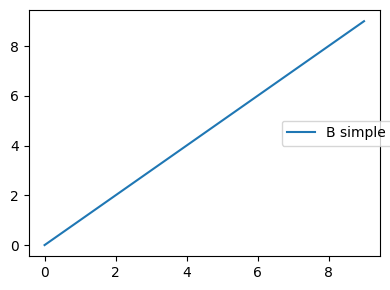

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='B simple plot')
leg = ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
leg.set_in_layout(False)
fig.tight_layout()
plt.show()

## Use with AxesGrid1

Limited support for `mpl_toolkits.axes_grid1` is provided.

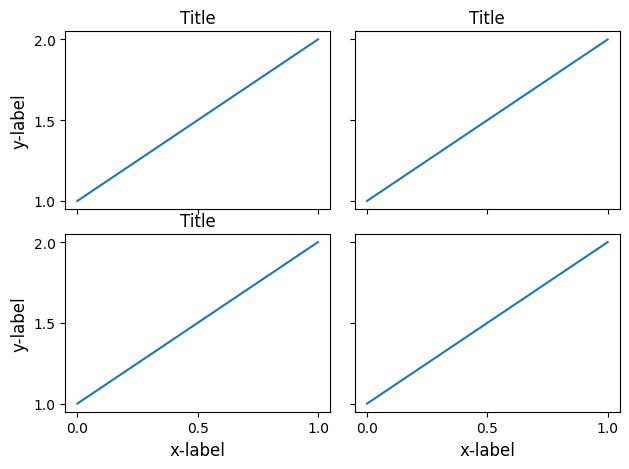

In [13]:
from mpl_toolkits.axes_grid1 import Grid

plt.close('all')
fig = plt.figure()
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

for ax in grid:
    example_plot(ax)
ax.title.set_visible(False)

plt.tight_layout()

## Colorbar

If you create a colorbar with `Figure.colorbar`, the created colorbar is
drawn in a Subplot as long as the parent Axes is also a Subplot, so
`Figure.tight_layout` will work.

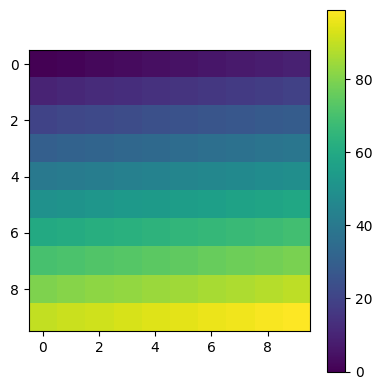

In [14]:
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

plt.colorbar(im)

plt.tight_layout()

Another option is to use the AxesGrid1 toolkit to
explicitly create an Axes for the colorbar.



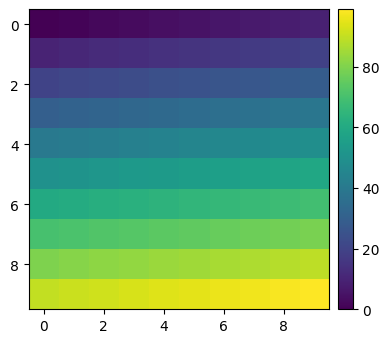

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()